In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [56]:
CUR_DIR = os.getcwd()
FILENAME = "ETS Full Data Set.xlsx" 
FILEPATH = CUR_DIR + '\\' + FILENAME
FILEPATH

'c:\\Users\\TylerDickens\\OneDrive - Zen\\Active Customers\\ARC Zen SW\\04 WIP\\TD\\ETS Full Data Set.xlsx'

In [57]:
ets_data = pd.read_excel(FILEPATH)

In [58]:
print(ets_data['Daily Route Status'].value_counts())
ets_routes = ets_data[ets_data['Daily Route Status'] == 'ROB Assigned Route']

No Route Assigned     17163
ROB Assigned Route     5022
Name: Daily Route Status, dtype: int64


In [59]:
comp_outliers = ets_routes['kWH for components'] > 1500
ets_routes = ets_routes[~comp_outliers]
ets_routes.describe()

,Start of Day Odometer,End of Day Odometer,Kilometers,Average Net kWH per KM,Average Gross kWH per KM,Start of Day SOC,End of Day SOC,Ave Ambient Temp (C),Ave Temp (EnviroCanada),Energy Charged (kWH),Regenerated kWH,Energy Consumed (kWH),kWH for components,Hours Charging,Hours Moving,Hours Stopped,Hours Operating
count,3612.000000,4452.000000,5019.000000,4963.000000,4963.000000,3756.000000,4631.000000,4877.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000
mean,7528.965001,7604.971607,149.388954,1.388193,2.467977,82.892173,80.208594,13.997950,9.304244,188.091494,60.445409,199.946932,280.317480,6.787804,5.582827,4.542668,14.857916
std,4375.021377,4439.002739,72.335945,0.670839,35.709744,19.414254,20.700145,9.361244,9.602258,144.572637,30.998515,90.545128,190.094314,5.141095,3.494024,3.223105,5.597088
min,262.250000,321.448000,0.000000,0.000000,0.060000,0.000000,0.000000,-23.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3969.452500,3973.970000,103.080000,1.160000,1.580000,70.000000,66.000000,8.000000,3.000000,72.565000,37.215000,136.125000,156.580000,2.940000,3.400000,2.450000,10.850000
50%,7069.675000,7156.220000,150.230000,1.270000,1.720000,90.000000,85.000000,15.000000,10.000000,178.360000,57.440000,194.510000,240.800000,5.880000,4.950000,3.830000,15.250000
75%,10650.425000,10762.025000,197.450000,1.470000,1.990000,100.000000,99.000000,21.000000,16.000000,279.530000,83.000000,256.555000,346.000000,9.985000,6.930000,5.600000,18.810000
max,21346.700000,21348.300000,2896.720000,24.530000,2489.040000,100.000000,100.000000,37.000000,30.000000,1056.980000,224.220000,659.280000,1066.650000,34.360000,19.440000,24.000000,24.000000


In [69]:
c1 = (ets_routes['Kilometers'] < 100)
c2 = (ets_routes['Kilometers'] < 200) & ( ets_routes['Kilometers'] >= 100) 
c3 =( ets_routes['Kilometers'] < 300) & (ets_routes['Kilometers'] >= 200 )
c4 = (ets_routes['Kilometers'] < 400) &( ets_routes['Kilometers'] >= 300 )
c5 = ets_routes['Kilometers'] >= 400
km_conditions = [c1, c2, c3, c4]#, c5]

v1 = "<100 km"
v2 = "100-200 km"
v3 = "200-300 km"
v4 = "300-400 km"
v5 = ">400 km"
km_values = [v1, v2, v3, v4]#, v5]

ets_routes['route_length'] = np.select(km_conditions, km_values, default= v1)

<AxesSubplot:xlabel='Ave Temp (EnviroCanada)', ylabel='Energy Consumed (kWH)'>

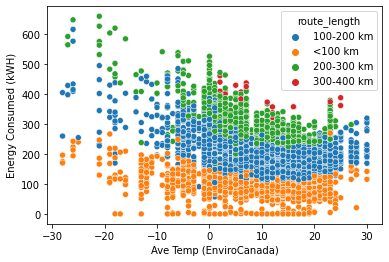

In [70]:
sns.scatterplot(data = ets_routes, x= 'Ave Temp (EnviroCanada)' , y='Energy Consumed (kWH)', hue='route_length' )

<AxesSubplot:xlabel='Ave Temp (EnviroCanada)', ylabel='Energy Consumed (kWH)'>

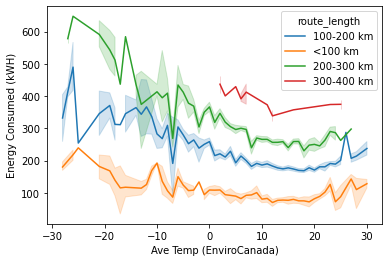

In [71]:
sns.lineplot(data = ets_routes, x= 'Ave Temp (EnviroCanada)' , y='Energy Consumed (kWH)', hue='route_length')

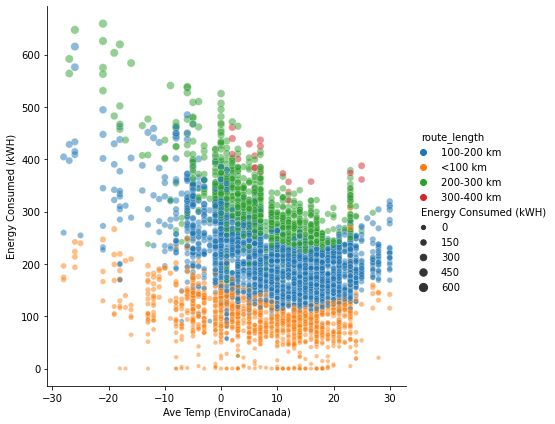

In [72]:
sns.relplot(data = ets_routes, x= 'Ave Temp (EnviroCanada)' , y='Energy Consumed (kWH)', hue='route_length', size='Energy Consumed (kWH)', alpha=0.5, height=6)

<AxesSubplot:>

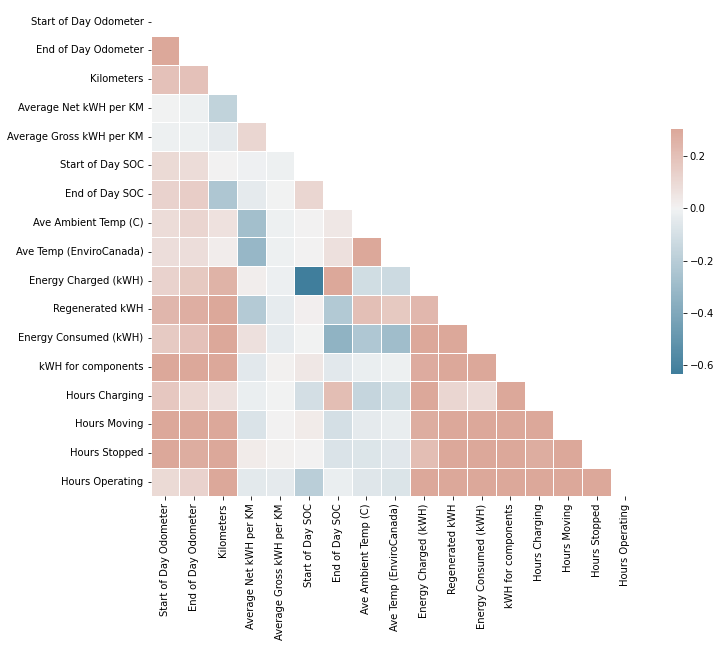

In [64]:
corr = ets_routes.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
map = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

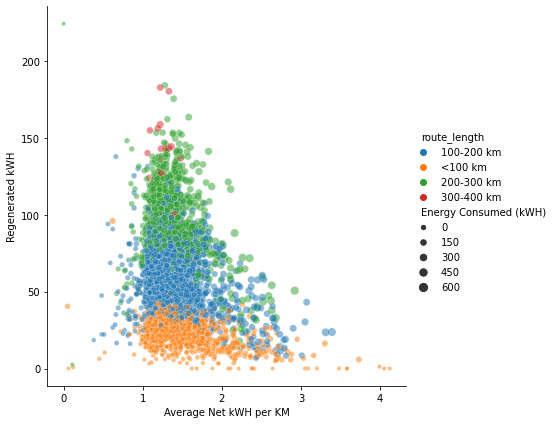

In [73]:
lt_5_net = ets_routes['Average Net kWH per KM'] < 5
data = ets_routes[lt_5_net]

sns.relplot(data = data, x= 'Average Net kWH per KM' , y='Regenerated kWH', hue='route_length', size='Energy Consumed (kWH)', alpha=0.5, height=6, s=10)

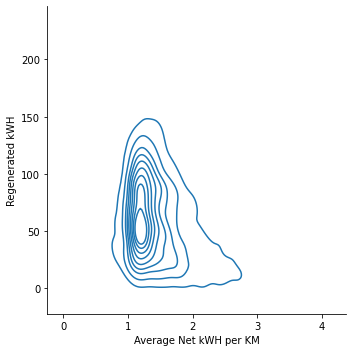

In [66]:
sns.displot(data = data, x= 'Average Net kWH per KM' , y='Regenerated kWH', kind='kde')